In [3]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 640.0 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [6]:
# data collection and processing 
gold_data = pd.read_csv('goldstock.csv')

In [8]:
gold_data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [9]:
gold_data=gold_data.drop('Unnamed: 0',axis=1)
gold_data

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [11]:
#for understanding the missing values and checking the completeness 
vals=gold_data.isnull()
vals.sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [14]:
#converting back to date and time format , assigning each of the objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

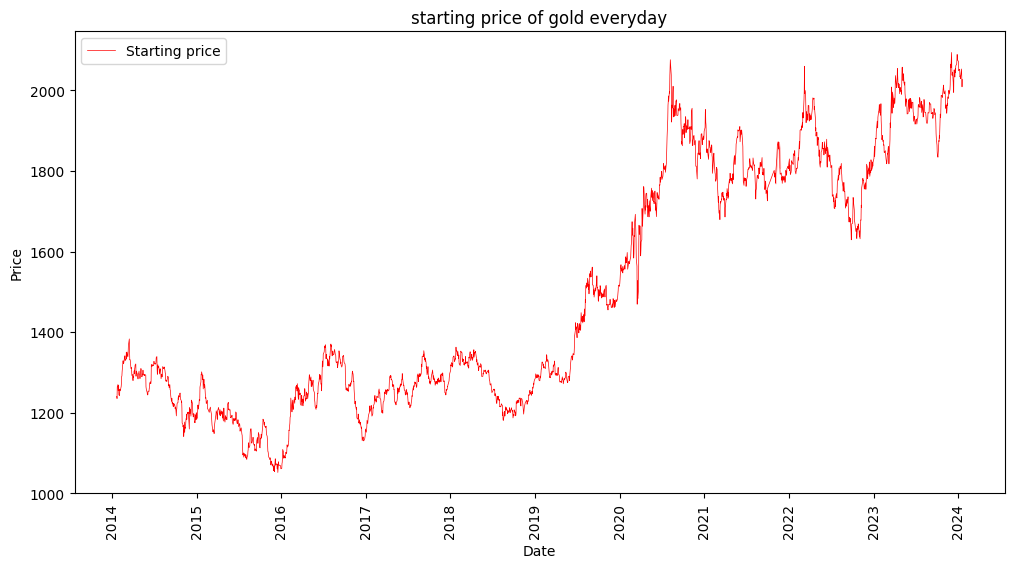

In [16]:
#shows a line representing the starting price of gold each day 
plt.figure(figsize=(12,6))
plt.title('starting price of gold everyday')
sns.lineplot(x=gold_data['Date'], y=gold_data.Open,label='Starting price',linewidth=0.5,color='red')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

In [17]:
#daily price range difference
gold_data['diff']=gold_data['High']-gold_data['Low']

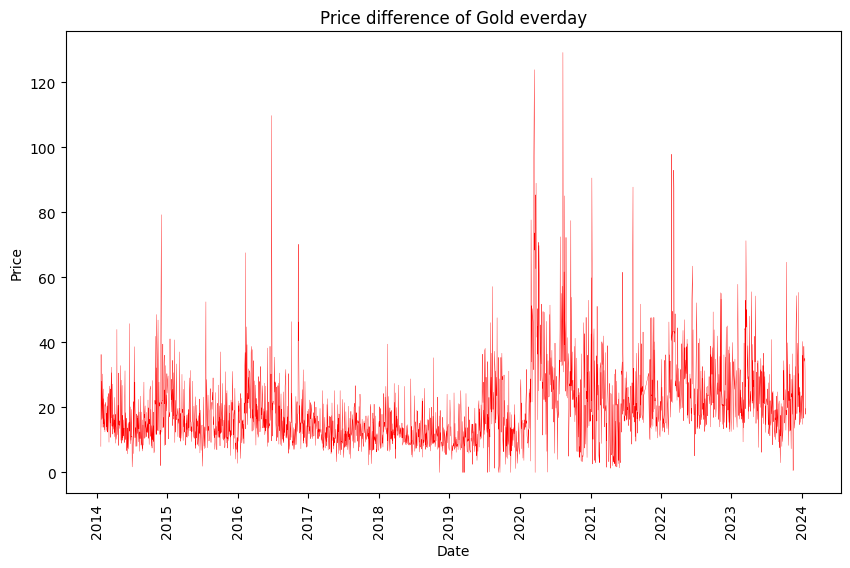

In [18]:
#a line showing  a price range difference each of the day 
plt.figure(figsize=(10,6))
plt.title('Price difference of Gold everday')
sns.lineplot(x=gold_data['Date'],y=gold_data['diff'],linewidth=0.25,color='red')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Gold Trading volume distribution')

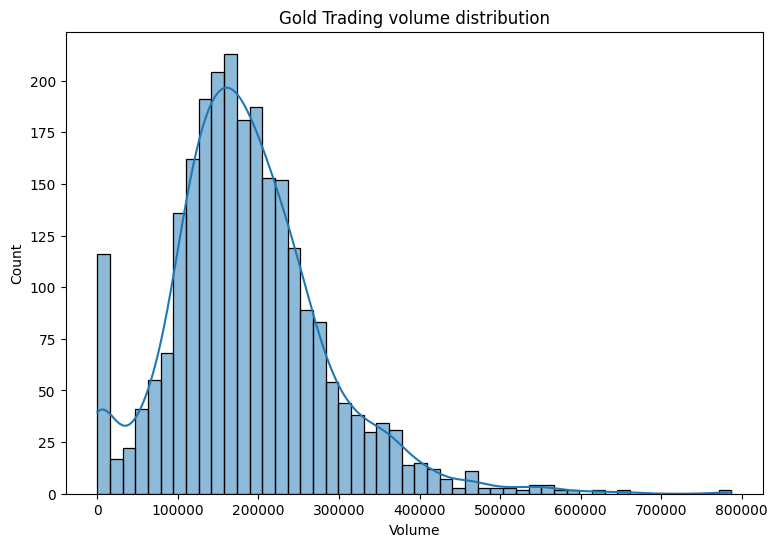

In [19]:
plt.figure(figsize=(9,6))
sns.histplot(gold_data.Volume,kde=True)
plt.title("Gold Trading volume distribution")

In [20]:
df_close = gold_data[['Date','Close']]
df_close

,Date,Close
0,2024-01-19,2029.3
1,2024-01-18,2021.6
2,2024-01-17,2006.5
3,2024-01-16,2030.2
4,2024-01-12,2051.6
...,...,...
2506,2014-01-28,1250.5
2507,2014-01-27,1263.5
2508,2014-01-24,1264.5
2509,2014-01-23,1262.5


In [22]:
X = gold_data[['Volume', 'Open', 'High', 'Low','diff']]
y = gold_data['Close']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [27]:
#calculates the mean squared error between the predicted values (y_pred) and the actual values (y_test).
mse = mean_squared_error(y_test, y_pred)
mse

35.896651683910356

In [28]:
#creates a new DataFrame named preddf containing two columns: 'actual' and 'predict'.
preddf = pd.DataFrame({'actual': y_test, 'predict': y_pred})
preddf

,actual,predict
983,1600.0,1594.436673
835,1962.1,1963.989530
1828,1268.6,1272.320993
1220,1291.1,1293.614011
65,1934.3,1928.097903
...,...,...
505,1798.8,1795.756517
2387,1309.4,1313.398520
1392,1254.5,1253.280584
85,1953.4,1952.206643


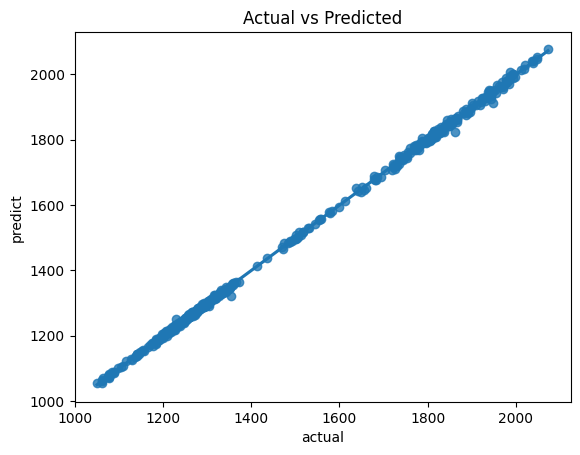

In [29]:
sns.regplot(x='actual', y='predict', data=preddf)
plt.title('Actual vs Predicted')
plt.show()
